In [2]:
import resiliencyTool as rt
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter("ignore") # warning are ignored for now

Unable to determine R home: [WinError 2] The system cannot find the file specified


In [3]:
simulationName = 'strata_example'
network = rt.network.Network(simulationName)
simulation = rt.simulation.Sim(simulationName)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |#######################

start= 1, stop= 41
start= 12, stop= 17


In [4]:
ref_return_period = 'rp1'
simulation.initialize_model_rp(network=network,
                               ref_return_period=ref_return_period,
                               iterationNumber=1,
                               maxTotalIteration=50,
                               cv=0.1)

          id  towers_1_rp1  towers_2_rp1  towers_1_rp2  towers_2_rp2  \
0        0.0      0.000000      0.001365      0.032985      0.026649   
1        1.0      0.000000      0.001365      0.032985      0.026649   
2        2.0      0.000000      0.001366      0.032986      0.026649   
3        3.0      0.000000      0.001366      0.032986      0.026650   
4        4.0      0.000000      0.001366      0.032986      0.026650   
...      ...           ...           ...           ...           ...   
9995  9995.0      0.014042      0.016777      0.046373      0.037128   
9996  9996.0      0.014561      0.017173      0.046864      0.037513   
9997  9997.0      0.015292      0.017714      0.047555      0.038056   
9998  9998.0      0.016542      0.018599      0.048737      0.038984   
9999  9999.0      0.033269      0.026840      0.065356      0.052033   

      towers_2_rp3  towers_1_rp4  towers_1_rp5  towers_2_rp5  towers_2_rp6  \
0         0.035992      0.057885      0.070849      0.056

<AxesSubplot:>

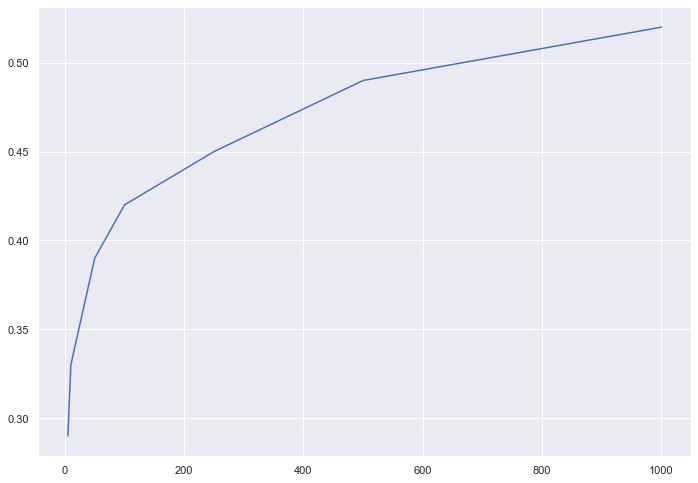

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=network.returnPeriods[ref_return_period].x_data, y=network.returnPeriods[ref_return_period].y_data)

In [6]:
simulation.stratResults

,Domain,Stratum,Population,Allocation,SamplingRate,Lower_X1,Upper_X1
1,1.0,1,4538.0,2.0,0.000521,0.720867,0.746296
2,1.0,2,2916.0,2.0,0.000686,0.746304,0.778395
3,1.0,3,1648.0,2.0,0.001214,0.778411,0.822219
4,1.0,4,898.0,3.0,0.003368,0.822266,1.517980


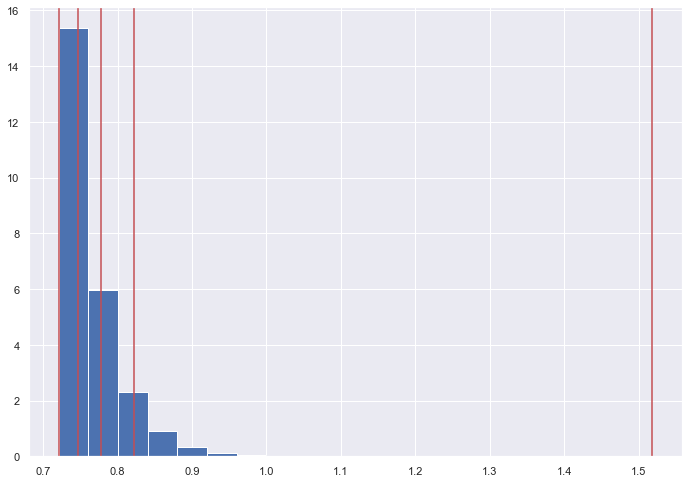

In [7]:
plt.hist(simulation.samples, density=True, bins=20)
for b in np.append(simulation.stratResults["Upper_X1"].values, simulation.stratResults["Lower_X1"].values[0]):
    plt.axvline(x = b, color = 'r')

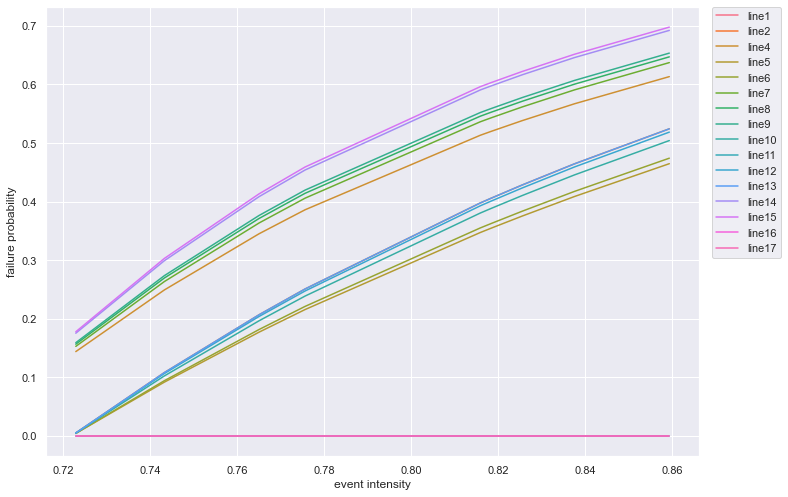

In [8]:
df = simulation.failureProbs[simulation.failureProbs['element type']=='Line']
sns.lineplot(data=df, x='event intensity', y='failure probability', hue='power element')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
rp1 = 'rp2'
rp2 = 'rp3'

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=network.returnPeriods[rp1].x_data, y=network.returnPeriods[rp1].y_data)
sns.lineplot(x=network.returnPeriods[rp2].x_data, y=network.returnPeriods[rp2].y_data)

In [ ]:
#fc1 = 'towers_1'
fc2 = 'towers_1'

x = network.fragilityCurves[fc2].x_data

sns.lineplot(x=x, y=network.fragilityCurves[fc2].y_data)
sns.lineplot(x=x, y=network.fragilityCurves[fc2].projected_fc(rp=network.returnPeriods[rp1], ref_rp=network.returnPeriods[rp2], xnew=x))

In [ ]:
y=200
I1 = network.returnPeriods[rp1].interpolate_inv_return_period(y)
I2 = network.returnPeriods[rp2].interpolate_inv_return_period(y)
print(f'I1 = {I1} and I2 = {I2}')

In [ ]:
fcp_i1 = network.fragilityCurves[fc2].projected_fc(rp=network.returnPeriods[rp2], ref_rp=network.returnPeriods[rp1], xnew=I1)
fc_i2 = network.fragilityCurves[fc2].interpolate(I2)
print(f'fcp_i1 = {fcp_i1} and fc_i2 = {fc_i2}')